# Facebook Live Selling Unsupervised Learning

## Task one: Data Loading and Data Analysis

In [2]:
# import libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
#load dataset
df=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00488/Live_20210128.csv')

In [4]:
#display first five observations
df.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,1,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,2,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,3,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,4,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,5,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


In [5]:
#print summary 
print('Summary of the data')
df.info()

Summary of the data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   status_id         7050 non-null   int64  
 1   status_type       7050 non-null   object 
 2   status_published  7050 non-null   object 
 3   num_reactions     7050 non-null   int64  
 4   num_comments      7050 non-null   int64  
 5   num_shares        7050 non-null   int64  
 6   num_likes         7050 non-null   int64  
 7   num_loves         7050 non-null   int64  
 8   num_wows          7050 non-null   int64  
 9   num_hahas         7050 non-null   int64  
 10  num_sads          7050 non-null   int64  
 11  num_angrys        7050 non-null   int64  
 12  Column1           0 non-null      float64
 13  Column2           0 non-null      float64
 14  Column3           0 non-null      float64
 15  Column4           0 non-null      float64
dtypes: float64(4), int64(1

We can observe that there are 7050 instances and 16 variables in the dataset. Two variables have character as their data types( object),10 variables have integers as their datatypes(int64),the last four have float(float64),however they are null. Now that we have identified the null colums we will eliminate them in the next section.

### Exploratory data analysis

In [6]:
#drop columns with missing variables
drop_columns=df.columns[12:].tolist()
df.drop(columns=drop_columns,axis=1,inplace=True)

In [7]:
#drop status id and status published
df.drop(columns=['status_id','status_published'],axis=1,inplace=True)

In [8]:
#check our dataset
df.isnull().sum()

status_type      0
num_reactions    0
num_comments     0
num_shares       0
num_likes        0
num_loves        0
num_wows         0
num_hahas        0
num_sads         0
num_angrys       0
dtype: int64

In [9]:
#check our dataset once again
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   status_type    7050 non-null   object
 1   num_reactions  7050 non-null   int64 
 2   num_comments   7050 non-null   int64 
 3   num_shares     7050 non-null   int64 
 4   num_likes      7050 non-null   int64 
 5   num_loves      7050 non-null   int64 
 6   num_wows       7050 non-null   int64 
 7   num_hahas      7050 non-null   int64 
 8   num_sads       7050 non-null   int64 
 9   num_angrys     7050 non-null   int64 
dtypes: int64(9), object(1)
memory usage: 550.9+ KB


We can see that our redundant columns have been eliminated. Now our dataset has 1 character variable(data type=object) and 9 numerical variables(data type=int64)

In [10]:
#check for uniqueness of data
df.nunique()

status_type         4
num_reactions    1067
num_comments      993
num_shares        501
num_likes        1044
num_loves         229
num_wows           65
num_hahas          42
num_sads           24
num_angrys         14
dtype: int64

In [11]:
df.status_type.unique()

array(['video', 'photo', 'link', 'status'], dtype=object)

[Text(0.5, 0, 'Status Type'), Text(0, 0.5, 'Count')]

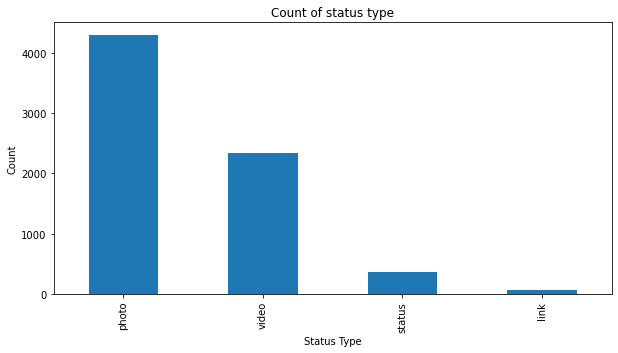

In [12]:
g=df.status_type.value_counts().plot(kind='bar',figsize=(10,5),title='Count of status type')
g.set(xlabel='Status Type',ylabel='Count')

From the graph ,it appears that most of the sellers seem to be using photo or video as status for selling. A very small sellers depend on status or link for posting an advertisement.

In [86]:
#Declaring feature vector and target variable
X=df[df.columns[1:].tolist()]
y=df['status_type']

In [87]:
#Label encode status type
from sklearn.preprocessing import LabelEncoder
l=LabelEncoder()
y=l.fit_transform(y)

In [15]:
#having a view of status type
y

array([3, 1, 3, ..., 1, 1, 1])

## Task two :Feature Scaling

In [16]:
#feature scaling
from sklearn.preprocessing import MinMaxScaler

In [88]:
X=MinMaxScaler().fit_transform(X)

In [89]:
X=pd.DataFrame(X,columns=(df.columns[1:].tolist()))
X.head()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,0.112314,0.024393,0.076519,0.091720,0.140030,0.010791,0.006369,0.019608,0.0
1,0.031847,0.000000,0.000000,0.031847,0.000000,0.000000,0.000000,0.000000,0.0
2,0.048195,0.011243,0.016647,0.043312,0.031963,0.003597,0.006369,0.000000,0.0
3,0.023567,0.000000,0.000000,0.023567,0.000000,0.000000,0.000000,0.000000,0.0
4,0.045223,0.000000,0.000000,0.043312,0.013699,0.000000,0.000000,0.000000,0.0


In [19]:
#importing kmeans
from sklearn.cluster import KMeans

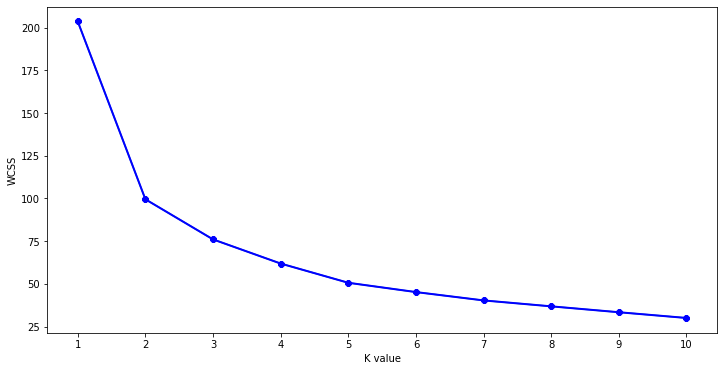

In [20]:
wcss=[]
for i in range(1,11):
    km=KMeans(n_clusters=i)
    km.fit(X)
    wcss.append(km.inertia_)
    
#elbow curve
plt.figure(figsize=(12,6))
plt.plot(range(1,11),wcss)
plt.plot(range(1,11),wcss,linewidth=2, color='blue',marker='8')
plt.xlabel('K value')
plt.xticks(np.arange(1,11,1))
plt.ylabel('WCSS')
plt.show()
         

The number of clusters is k=2

In [21]:
#Getting the silhouette scores based on 2 clusters
from sklearn.metrics import silhouette_samples,silhouette_score
clusterer=KMeans(n_clusters=2)
cluster_labels=clusterer.fit_predict(X)
score=silhouette_score(X,cluster_labels)
print('Silhouette Score:%.3f'% score)

Silhouette Score:0.813


In [22]:
range_n_clusters=[2,3,4,5,6]
for n_clusters in range_n_clusters:
    clusterer=KMeans(n_clusters=n_clusters)
    cluster_labels=clusterer.fit_predict(X)
    silhouette_average=silhouette_score(X,cluster_labels)
    print('For n_clusters=',n_clusters,'the average silhouette score is:',silhouette_average,)

For n_clusters= 2 the average silhouette score is: 0.8125263296260059
For n_clusters= 3 the average silhouette score is: 0.8186202280538375
For n_clusters= 4 the average silhouette score is: 0.6441638843223956
For n_clusters= 5 the average silhouette score is: 0.6961774467133425
For n_clusters= 6 the average silhouette score is: 0.6197096848338359


Silhouette analysis has a range of[-1,1] Silhouette coefficients near +1 indicate that the sample is far away from the neighbouring clusters.A value of 0 indicates that the sample is on or very close to the decision boundary between two neighbouring clusters and negative values indicate that the samples might have been assigned to the wrong cluster. Therefore a higher silhouette coefficient score relates to a model with better defined clusters.

In [25]:
#assigning cluster label to each instance of the dataframe
km=KMeans(n_clusters=3).fit(X)
cluster_map=pd.DataFrame()
cluster_map['data_index']=X.index.values
cluster_map['cluster']=km.labels_

In [26]:
#filter all datapoints in cluster 1
x=cluster_map[cluster_map.cluster == 1]

In [27]:
x

,data_index,cluster
112,112,1
166,166,1
355,355,1
361,361,1
726,726,1
...,...,...
6266,6266,1
6270,6270,1
6271,6271,1
6272,6272,1


In [29]:
#cluster 2
y=cluster_map[cluster_map.cluster == 2]
y

,data_index,cluster
99,99,2
238,238,2
343,343,2
413,413,2
480,480,2
...,...,...
6808,6808,2
6810,6810,2
6814,6814,2
6827,6827,2


In [30]:
#cluster 3
z=cluster_map[cluster_map.cluster == 3]
z

,data_index,cluster


In [36]:
cluster=KMeans(n_clusters=3)

In [40]:
cluster.cluster_centers_

array([[2.19286388e-01, 1.64379599e-01, 1.74805296e-01, 1.69190847e-01,
        3.00076104e-01, 8.72102318e-02, 6.79759377e-02, 4.48801743e-02,
        5.07168459e-02],
       [3.87439787e-01, 2.91856849e-03, 4.34080118e-03, 3.86212132e-01,
        4.72169032e-03, 8.76073335e-03, 1.24991439e-03, 8.43348092e-04,
        1.73430454e-04],
       [2.47528065e-02, 6.87617299e-03, 7.59103089e-03, 2.27384680e-02,
        1.24370313e-02, 2.11465177e-03, 2.85830231e-03, 3.89260044e-03,
        2.54668930e-03]])

### Perform PCA

In [90]:
from sklearn.decomposition import PCA
model=PCA(random_state=0)
model.fit(X)
model.fit_transform(X)

array([[ 1.02165567e-01,  1.08707054e-01, -2.44453210e-02, ...,
        -1.49833408e-02, -3.13047576e-03, -1.91770578e-06],
       [-2.67440190e-02, -2.15023005e-02, -1.84029572e-03, ...,
        -3.37858930e-04, -7.76821038e-06, -3.12271101e-07],
       [ 2.06381178e-04,  1.12106675e-02, -4.78918065e-03, ...,
        -5.03009767e-03, -1.48254431e-03, -6.75715645e-07],
       ...,
       [-7.01095777e-02, -1.12235089e-02, -3.70770926e-03, ...,
        -4.26477081e-04, -7.64617561e-04, -3.46079070e-07],
       [ 3.30610339e-02, -2.85922302e-02, -2.75306179e-04, ...,
        -5.88928351e-04,  3.82059729e-03, -1.70027225e-07],
       [-6.58017197e-02, -1.32946992e-02, -3.02005326e-03, ...,
        -2.77400201e-04, -8.99729990e-05, -2.92853245e-07]])

In [91]:
transformed=model.transform(X)
X

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,0.112314,0.024393,0.076519,0.091720,0.140030,0.010791,0.006369,0.019608,0.0
1,0.031847,0.000000,0.000000,0.031847,0.000000,0.000000,0.000000,0.000000,0.0
2,0.048195,0.011243,0.016647,0.043312,0.031963,0.003597,0.006369,0.000000,0.0
3,0.023567,0.000000,0.000000,0.023567,0.000000,0.000000,0.000000,0.000000,0.0
4,0.045223,0.000000,0.000000,0.043312,0.013699,0.000000,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...
7045,0.018896,0.000000,0.000000,0.018896,0.000000,0.000000,0.000000,0.000000,0.0
7046,0.003397,0.000000,0.000000,0.002972,0.001522,0.000000,0.006369,0.000000,0.0
7047,0.000425,0.000000,0.000000,0.000212,0.001522,0.000000,0.000000,0.000000,0.0
7048,0.074522,0.000572,0.006425,0.074098,0.003044,0.000000,0.000000,0.000000,0.0


Text(0.5, 1.0, 'Distribution of Status type')

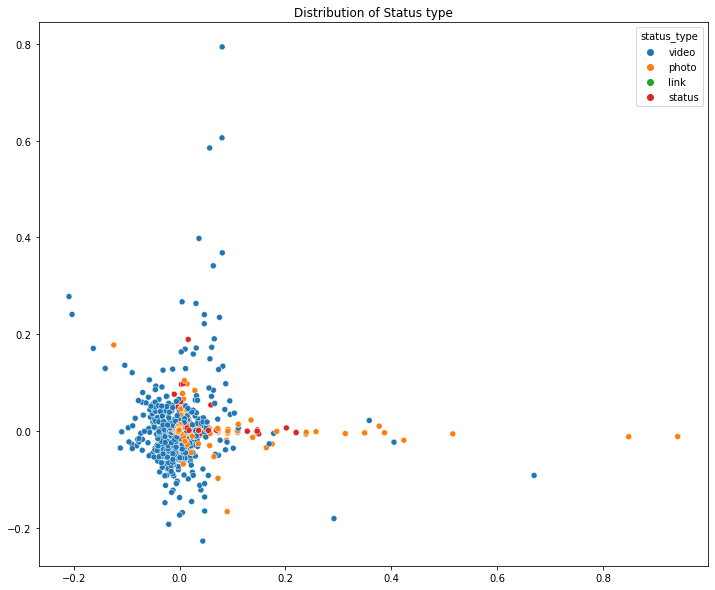

In [94]:
plt.figure(figsize=(12,10))
sns.scatterplot(x=transformed[:,3],y=transformed[:,4],hue=df['status_type'])
plt.title("Distribution of Status type")

### Using Stochastic Neighbor Embedding

In [95]:
from sklearn.manifold import TSNE
tsne=TSNE(n_components=2,random_state=0).fit(X)

<AxesSubplot:title={'center':'The distribution of Stochastic Neighbor Embedding'}>

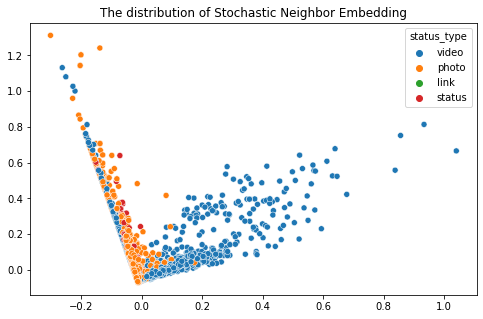

In [97]:
plt.figure(figsize=(8,5))
plt.title('The distribution of Stochastic Neighbor Embedding')
sns.scatterplot(x=transformed[:,1],y=transformed[:,0],hue=df['status_type'])

## Task 3:Perform PCA

In [58]:
#import libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import matplotlib.cm as cm

In [60]:
data=pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/fruit_data.csv')

In [61]:
data.head()

,fruit_label,mass,width,height,color_score
0,1,192,8.4,7.3,0.55
1,1,180,8.0,6.8,0.59
2,1,176,7.4,7.2,0.60
3,2,86,6.2,4.7,0.80
4,2,84,6.0,4.6,0.79


In [64]:
X=data.values
X.shape #feature matrix

(59, 5)

In [75]:
#Standardize
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler(with_mean=False,with_std=False)
scaler.fit(X)
x_scaled=scaler.transform(X)

In [76]:
#find first 2 principal components using PCA
pca_2=PCA(n_components=2,random_state=0)
pca_2.fit(x_scaled)
X_pca_2=pca_2.transform(x_scaled)

In [77]:
#find  4 principal components using PCA
pca_4=PCA(n_components=4,random_state=0)
pca_4.fit(x_scaled)
X_pca_4=pca_4.transform(x_scaled)

In [80]:
#explained variance ratio
pca_4.explained_variance_ratio_*100

array([9.99082568e+01, 7.21661472e-02, 1.68906865e-02, 2.53120051e-03])

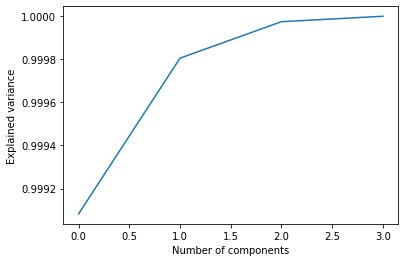

In [81]:
#plot of variance ratio
np.cumsum(pca_4.explained_variance_ratio_*100)
plt.plot(np.cumsum(pca_4.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
plt.show()